# Red para COVID-19

Esta es una red secuencial simple para tratar de predecir el dato de número de contagiados de COVID19 en México que se da a las 19:00 horas por parte del gobierno.

**Para ejecutar la predicción:**

**1)** Ejecutar processing.sh, este script descarga el archivo time_series_covid19_confirmed_global.csv con datos de contagiados por país. Este archivo se actualiza en internet aproximadamente a las 5:30pm con datos del día anterior, hay que revisar que esté actualizado a la fecha del día de la predicción.

chmod +x processing.sh

./processing.sh

**2)** Abrir jupyter notebook (se requiere keras, tensorflow, pandas y numpy instaldos).

jupyter notebook COVID-19.ipynb

**3)** Actualizar dias_a_usar y dia_a_predecir. Como referencia, el 30 de marzo fue el día 33 de infección en México, por lo que dia_a_predecir=33 y dias_a_usar=32.

**4)** Ejecutar todos los cuadros.

Creado por Juan Felipe Huan Lew Yee, Neftalí Isaí Rodríguez Rojas y Jorge Martín del Campo Ramírez.

Se define la clase pais

In [1]:
class Pais:
    def __init__(self,name):
        self.name = name
        self.area = -1
        self.poblacion = -1
        self.continente = 'none'
        self.lat = -1
        self.long = -1
        self.dia_inicio = 0  
        self.PIB = -1          
        self.gasto_salud = -1          
        self.infected = []

Definimos el dia que queremos la prediccion

In [2]:
dia_a_predecir = 35
dias_a_usar = 33

Definimos la lista de paises que analizaremos. (Hay más paises en la base de datos de John Hopkins)

In [3]:
#Quite a Vietnam y Dominica porque siempre salen mal sus predicciones.
country_namelist = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'AntiguaandBarbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'BosniaandHerzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'BurkinaFaso', 'CaboVerde', 'Cambodia', 'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador', 'EquatorialGuinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'HolySee', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', '"KoreaSouth"', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'NewZealand', 'Nicaragua', 'Niger', 'Nigeria', 'NorthMacedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'PapuaNewGuinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'SaintLucia', 'SaintVincentandtheGrenadines', 'SanMarino', 'SaudiArabia', 'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'SouthAfrica', 'Spain', 'SriLanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Taiwan', 'Tanzania', 'Thailand', 'Togo', 'TrinidadandTobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'UnitedArabEmirates', 'UnitedKingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Zambia', 'Zimbabwe', 'Grenada', 'Mozambique', 'Syria', 'Timor-Leste', 'Belize', 'Laos', 'Libya', 'WestBankandGaza', 'Guinea-Bissau', 'Mali', 'SaintKittsandNevis', 'Kosovo', 'Burma', 'MSZaandam']
country_objectlist = []

Abrimos la base de datos de Superficie, Población y Continente por país, creamos un objeto para cada país. Posterirmente, abirmos la base de datos de John Hopkins y extraemos los datos de infectos por día y la latitud y longitud de cada país. También calculamos el día de inicio de la infección

In [4]:
for country in country_namelist:
    f = open('sup-pob-cont.csv')
    pais = Pais(country)
    for line in f:
        if(country in line):
            pais.area=line.split(',')[1]
            pais.poblacion=line.split(',')[2]
            if('Namerica' in line.replace('\n','').split(',')[3]):
                pais.continente='1 0 0 0 0 0'
            if('Samerica' in line.replace('\n','').split(',')[3]):
                pais.continente='0 1 0 0 0 0'
            if('Europe' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 1 0 0 0'
            if('Asia' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 1 0 0'
            if('Oceania' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 0 1 0'
            if('Africa' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 0 0 1'
#            pais.continente = line.replace('\n','').split(',')[3]
            break
    f.close()
    
    f = open('database_confirmed.csv')
    for line in f:
        if(country in line.split(',')[1]):
            pais.lat = float(line.split(',')[2])
            pais.long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    pais.infected.append(int(number))
                else:
                    pais.dia_inicio += 1                    
    f.close()

    f = open('PIB.txt')
    for line in f:
        if(country in line.split()[1]):
            pais.PIB = float(line.split()[2])
    f.close()

    f = open('gasto_salud.csv')
    for line in f:
        if(country in line.split(',')[0]):
            pais.gasto_salud = float(line.split(',')[1])
    f.close()
    
    country_objectlist.append(pais)

Usamos la lista de objetos Pais para nuestra propia base de datos.

In [5]:
db = open('database.txt','w')
print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",file=db,end = ' ')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ' ')
print(dia_a_predecir,file=db)

for country in country_objectlist:
    if(country.area == -1 or country.poblacion == -1 or country.continente == 'none' or country.lat == -1 or country.long == -1 or country.PIB == -1 or country.gasto_salud == -1 or len(country.infected)<dia_a_predecir):
        if(len(country.infected)>=dia_a_predecir):
            print(country.name,country.area,country.poblacion,country.continente,country.lat,country.long,country.PIB,country.gasto_salud,len(country.infected))
        continue
    print(country.name,country.area,country.poblacion,country.continente,country.lat,country.long,country.dia_inicio,country.PIB,country.gasto_salud,file=db,end = ' ')
    for value in country.infected[:dias_a_usar]:
        print(value,file=db,end = ' ')
    print(country.infected[dia_a_predecir-1],file=db)
db.close()            

NewZealand -1 -1 none -40.9006 174.886 204671.0 9.2 35
SanMarino -1 -1 none 43.9424 12.4578 -1 7.4 36
Taiwan -1 -1 none 23.7 121.0 -1 -1 72


Importamos librerias

In [6]:
import numpy as np
import keras
import pandas as pd

Using TensorFlow backend.


Leamos la base de datos que acabamos de crear.

In [7]:
data = pd.read_csv("database.txt",sep=' ') 

Imprimimos la base de datos

In [8]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Afghanistan,250000,29835392,0,0,0,1,0,0,33.000000,...,22,24,24,40,40,74,84,94,110,120
1,Algeria,919590,34994937,0,0,0,0,0,1,28.033900,...,90,139,201,230,264,302,367,409,454,584
2,Australia,2967893,21766711,0,0,0,0,1,0,-31.996188,...,15,15,15,15,15,15,15,15,15,25
3,Austria,32382,8217280,0,0,1,0,0,0,47.516200,...,2388,2814,3582,4474,5283,5588,6909,7657,8271,9618
4,Bahrain,257,1214705,0,0,0,1,0,0,26.027500,...,278,285,305,334,377,392,419,458,466,499
5,Belarus,80154,9577552,0,0,1,0,0,0,53.709800,...,81,81,86,86,94,94,94,152,152,304
6,Belgium,11787,10431477,0,0,1,0,0,0,50.833300,...,1,1,2,8,13,23,50,109,169,239
7,Brazil,3286470,203429773,0,1,0,0,0,0,-14.235000,...,1021,1546,1924,2247,2554,2985,3417,3904,4256,5717
8,Cambodia,69900,14701717,0,0,0,1,0,0,11.550000,...,1,1,1,1,1,1,1,1,1,1
9,Canada,3855081,34030589,1,0,0,0,0,0,47.982907,...,8,8,9,9,9,10,11,11,13,20


Normalizamos algunas variables

In [9]:
from sklearn import preprocessing

print("Area")
area = data.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
areamax=area.max()
areamin=area.min()
normalized_area=(area-area.min())/(area.max()-area.min())
print(areamin,areamax)
data['Area'] = normalized_area
print(areamin,areamax)

print("Poblacion")
poblacion = data.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
poblacionmax=poblacion.max()
poblacionmin=poblacion.min()
normalized_poblacion=(poblacion-poblacion.min())/(poblacion.max()-poblacion.min())
print(poblacionmin,poblacionmax)
data['poblacion'] = normalized_poblacion
print(poblacionmin,poblacionmax)

print("lat")
lat = data.lat #returns a numpy array
latmax=lat.max()
latmin=lat.min()
normalized_lat=(lat-lat.min())/(lat.max()-lat.min())
print(latmin,latmax)
data['lat'] = normalized_lat
print(latmin,latmax)

print("long")
long = data.long #returns a numpy array
longmax=long.max()
longmin=long.min()
normalized_long=(long-long.min())/(long.max()-long.min())
print(longmin,longmax)
data['long'] = normalized_long
print(longmin,longmax)

print("Dia_inicio")
Dia_inicio = data.Dia_inicio #returns a numpy array
Dia_iniciomax=Dia_inicio.max()
Dia_iniciomin=Dia_inicio.min()
normalized_Dia_inicio=(Dia_inicio-Dia_inicio.min())/(Dia_inicio.max()-Dia_inicio.min())
print(Dia_iniciomin,Dia_iniciomax)
data['Dia_inicio'] = normalized_Dia_inicio
print(Dia_iniciomin,Dia_iniciomax)

print("PIB")
PIB = data.PIB #returns a numpy array
PIBmax=PIB.max()
PIBmin=PIB.min()
normalized_PIB=(PIB-PIB.min())/(PIB.max()-PIB.min())
print(PIBmin,PIBmax)
data['PIB'] = normalized_PIB
print(PIBmin,PIBmax)

print("Gasto_Salud")
Gasto_Salud = data.Gasto_Salud #returns a numpy array
Gasto_Saludmax=Gasto_Salud.max()
Gasto_Saludmin=Gasto_Salud.min()
normalized_Gasto_Salud=(Gasto_Salud-Gasto_Salud.min())/(Gasto_Salud.max()-Gasto_Salud.min())
print(Gasto_Saludmin,Gasto_Saludmax)
data['Gasto_Salud'] = normalized_Gasto_Salud
print(Gasto_Saludmin,Gasto_Saludmax)

Area
257 313232044
257 313232044
Poblacion
25332 1336718015
25332 1336718015
lat
-31.9961875 64.9631
-31.9961875 64.9631
long
-102.5528 141.2327875
-102.5528 141.2327875
Dia_inicio
0 225
0 225
PIB
9443.0 21439453.0
9443.0 21439453.0
Gasto_Salud
2.5 17.1
2.5 17.1


Imprimimos la base de datos normalizada

In [10]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Afghanistan,7.973105e-04,0.022301,0,0,0,1,0,0,0.670345,...,22,24,24,40,40,74,84,94,110,120
1,Algeria,2.934993e-03,0.026161,0,0,0,0,0,1,0.619127,...,90,139,201,230,264,302,367,409,454,584
2,Australia,9.474249e-03,0.016265,0,0,0,0,1,0,0.000000,...,15,15,15,15,15,15,15,15,15,25
3,Austria,1.025598e-04,0.006129,0,0,1,0,0,0,0.820060,...,2388,2814,3582,4474,5283,5588,6909,7657,8271,9618
4,Bahrain,0.000000e+00,0.000890,0,0,0,1,0,0,0.598434,...,278,285,305,334,377,392,419,458,466,499
5,Belarus,2.550731e-04,0.007146,0,0,1,0,0,0,0.883938,...,81,81,86,86,94,94,94,152,152,304
6,Belgium,3.680980e-05,0.007785,0,0,1,0,0,0,0.854271,...,1,1,2,8,13,23,50,109,169,239
7,Brazil,1.049131e-02,0.152170,0,1,0,0,0,0,0.183182,...,1021,1546,1924,2247,2554,2985,3417,3904,4256,5717
8,Cambodia,2.223369e-04,0.010980,0,0,0,1,0,0,0.449118,...,1,1,1,1,1,1,1,1,1,1
9,Canada,1.230662e-02,0.025440,1,0,0,0,0,0,0.824873,...,8,8,9,9,9,10,11,11,13,20


Creamos un conjunto X y un conjunto Y y dividimos train y test

In [11]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
X['Area'] = data['Area']
X['poblacion'] = data['poblacion']
X['Namerica'] = data['Namerica']
X['Samerica'] = data['Samerica']
X['Europe'] = data['Europe']
X['Asia'] = data['Asia']
X['Oceania'] = data['Oceania']
X['lat'] = data['lat']
X['long'] = data['long']
X['Dia_inicio'] = data['Dia_inicio']
X['PIB'] = data['PIB']
X['Gasto_Salud'] = data['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X[str(i)] = data[str(i)]
Y = pd.DataFrame()
Y[str(dia_a_predecir)] = data[str(dia_a_predecir)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 45) (50, 1)
(3, 45) (3, 1)


Creamos la red neuronal

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(32, input_dim=dias_a_usar+12, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

Compilamos la red

In [13]:
model.compile(loss='MAPE', optimizer='adam')

Entrenamos la red

In [14]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test,y_test))

Train on 50 samples, validate on 3 samples
Epoch 1/150
50/50 [==============================] - 1s 19ms/step - loss: 85.0884 - val_loss: 91.2832
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 78.9881 - val_loss: 87.7289
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 72.2069 - val_loss: 83.9300
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: 64.3691 - val_loss: 79.6673
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 57.6907 - val_loss: 75.3852
Epoch 6/150
50/50 [==============================] - 0s 344us/step - loss: 52.3135 - val_loss: 71.0773
Epoch 7/150
50/50 [==============================] - 0s 324us/step - loss: 46.3962 - val_loss: 66.7201
Epoch 8/150
50/50 [==============================] - 0s 506us/step - loss: 41.8413 - val_loss: 62.2835
Epoch 9/150
50/50 [==============================] - 0s 378us/step - loss: 37.9748 - val_loss: 58.1735
Epoch 10/150
50/50 [===================

50/50 [==============================] - 0s 324us/step - loss: 11.8979 - val_loss: 38.4977
Epoch 80/150
50/50 [==============================] - 0s 182us/step - loss: 11.9983 - val_loss: 38.9339
Epoch 81/150
50/50 [==============================] - 0s 169us/step - loss: 11.7075 - val_loss: 38.2182
Epoch 82/150
50/50 [==============================] - 0s 196us/step - loss: 11.6160 - val_loss: 38.3463
Epoch 83/150
50/50 [==============================] - 0s 189us/step - loss: 11.4843 - val_loss: 38.4599
Epoch 84/150
50/50 [==============================] - 0s 208us/step - loss: 11.3724 - val_loss: 37.2513
Epoch 85/150
50/50 [==============================] - 0s 217us/step - loss: 11.7282 - val_loss: 37.9812
Epoch 86/150
50/50 [==============================] - 0s 213us/step - loss: 11.7747 - val_loss: 37.6574
Epoch 87/150
50/50 [==============================] - 0s 198us/step - loss: 11.4777 - val_loss: 35.8073
Epoch 88/150
50/50 [==============================] - 0s 177us/step - loss: 1

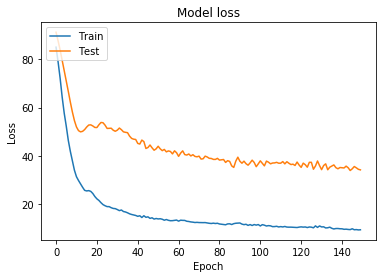

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Realizamos predicciones del test

In [16]:
model.predict(X_test)

array([[  15.952339],
       [  67.2298  ],
       [3764.1187  ]], dtype=float32)

Comprobamos

In [17]:
y_test

,35
16,38
51,116
26,3858


# Predicción

In [18]:
country_prediction_namelist = ['Mexico']
country_prediction_objectlist = []

In [19]:
for country in country_prediction_namelist:
    f = open('sup-pob-cont.csv')
    pais = Pais(country)
    for line in f:
        if(country in line):
            pais.area=line.split(',')[1]
            pais.poblacion=line.split(',')[2]
            if('Namerica' in line.replace('\n','').split(',')[3]):
                pais.continente='1 0 0 0 0 0'
            if('Samerica' in line.replace('\n','').split(',')[3]):
                pais.continente='0 1 0 0 0 0'
            if('Europe' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 1 0 0 0'
            if('Asia' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 1 0 0'
            if('Oceania' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 0 1 0'
            if('Africa' in line.replace('\n','').split(',')[3]):
                pais.continente='0 0 0 0 0 1'
#            pais.continente = line.replace('\n','').split(',')[3]
            break
    f.close()
    
    f = open('database_confirmed.csv')
    for line in f:
        if(country in line.split(',')[1]):
            pais.lat = float(line.split(',')[2])
            pais.long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    pais.infected.append(int(number))
                else:
                    pais.dia_inicio += 1                    
    f.close()
    
    f = open('PIB.txt')
    for line in f:
        if(country in line.split()[1]):
            pais.PIB = float(line.split()[2])
    f.close()
    
    f = open('gasto_salud.csv')
    for line in f:
        if(country in line.split(',')[0]):
            pais.gasto_salud = float(line.split(',')[1])
    f.close()
    
    country_prediction_objectlist.append(pais)

In [20]:
db = open('database_prediction.txt','w')
print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",file=db,end = ' ')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ' ')
print(dia_a_predecir,file=db)

for country in country_prediction_objectlist:
    if(country.area == -1 or country.poblacion == -1 or country.continente == 'none' or country.lat == -1 or country.long == -1 or country.gasto_salud == -1 or len(country.infected)<dias_a_usar):
        print(country.name,len(country.infected))
        continue
    print(country.name,country.area,country.poblacion,country.continente,country.lat,country.long,country.dia_inicio,country.PIB,country.gasto_salud,file=db,end = ' ')
    for value in country.infected[:dias_a_usar]:
        print(value,file=db,end = ' ')
    if(len(country.infected)>=dia_a_predecir):
        print(country.infected[dia_a_predecir-1],file=db)
    else:
        print(-1,file=db)
db.close()            

In [21]:
data_prediction = pd.read_csv("database_prediction.txt",sep=' ') 

In [22]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Mexico,761602,113724226,1,0,0,0,0,0,23.6345,...,316,367,405,475,585,717,848,993,1094,1378


In [23]:
area_prediction = data_prediction.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
normalized_area_prediction=(area_prediction-areamin)/(areamax-areamin)
data_prediction['Area'] = normalized_area_prediction

poblacion_prediction = data_prediction.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
normalized_poblacion_prediction=(poblacion_prediction-poblacionmin)/(poblacionmax-poblacionmin)
data_prediction['poblacion'] = normalized_poblacion_prediction

lat_prediction = data_prediction.lat #returns a numpy array
normalized_lat_prediction=(lat_prediction-latmin)/(latmax-latmin)
data_prediction['lat'] = normalized_lat_prediction

long_prediction = data_prediction.long #returns a numpy array
normalized_long_prediction=(long_prediction-longmin)/(longmax-longmin)
data_prediction['long'] = normalized_long_prediction

Dia_inicio_prediction = data_prediction.Dia_inicio #returns a numpy array
normalized_Dia_inicio_prediction=(Dia_inicio_prediction-Dia_iniciomin)/(Dia_iniciomax-Dia_iniciomin)
data_prediction['Dia_inicio'] = normalized_Dia_inicio_prediction

PIB_prediction = data_prediction.PIB #returns a numpy array
normalized_PIB_prediction=(PIB_prediction-PIBmin)/(PIBmax-PIBmin)
data_prediction['PIB'] = normalized_PIB_prediction

Gasto_Salud_prediction = data_prediction.Gasto_Salud #returns a numpy array
normalized_Gasto_Salud_prediction=(Gasto_Salud_prediction-Gasto_Saludmin)/(Gasto_Saludmax-Gasto_Saludmin)
data_prediction['Gasto_Salud'] = normalized_Gasto_Salud_prediction

In [24]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Mexico,0.002431,0.08506,1,0,0,0,0,0,0.573753,...,316,367,405,475,585,717,848,993,1094,1378


In [25]:
from sklearn.model_selection import train_test_split
X_prediction = pd.DataFrame()
#X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
X_prediction['Area'] = data_prediction['Area']
X_prediction['poblacion'] = data_prediction['poblacion']
X_prediction['Namerica'] = data_prediction['Namerica']
X_prediction['Samerica'] = data_prediction['Samerica']
X_prediction['Europe'] = data_prediction['Europe']
X_prediction['Asia'] = data_prediction['Asia']
X_prediction['Oceania'] = data_prediction['Oceania']
X_prediction['lat'] = data_prediction['lat']
X_prediction['long'] = data_prediction['long']
X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
X_prediction['PIB'] = data_prediction['PIB']
X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X_prediction[str(i)] = data_prediction[str(i)]
Y_prediction = pd.DataFrame()
Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
print(X_prediction.shape, Y_prediction.shape)

(1, 45) (1, 1)


In [26]:
model.predict(X_prediction)

array([[1392.6554]], dtype=float32)

In [27]:
Y_prediction

,35
0,1378
